PROJECT 2

PART (1) QUESTION (1.1) There are 4039 Nodes and 88234 Edges

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install python-igraph==0.9.6
!pip install cairocffi

In [3]:
import igraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
import tqdm

PART (1) QUESTION (1.2) The graph is connected:

In [4]:
path = '/content/gdrive/MyDrive/Colab Notebooks/232/Project_2/facebook_combined.txt'

# Load file
data = np.loadtxt(path, dtype=int)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['source', 'target'])

# Create graph
g = igraph.Graph.DataFrame(df, directed=False)

# Print the graph summary
print(g.summary())

IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)


In [ ]:
# Check if the graph is connected
if g.is_connected():
    print("The graph is connected!")
else:
    print("The graph is not connected!")
        # Get the size of the GCC
    gcc = g.clusters().giant()
    print("The size of the GCC is:", gcc.vcount())

The graph is connected!


PART 1 QUESTION (2)

In [ ]:
# Find the diameter of the graph
diameter = g.diameter()
print("The diameter of the graph is:", diameter)

The diameter of the graph is: 8


PART 1 QUESTION (3)

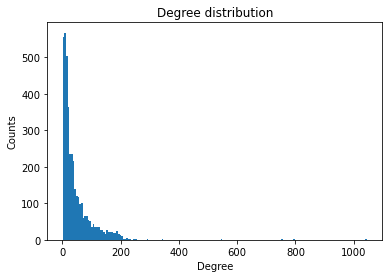

The average degree of the graph is: 43.69101262688784


In [ ]:
# Compute the degree of each vertex in the graph
degree = g.degree()

# Compute the degree distribution
degree_dist = g.degree_distribution()

# Plot the degree distribution
plt.hist(degree, 'auto')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

# Report the average degree
avg_degree = sum(degree) / len(degree)
print("The average degree of the graph is:", avg_degree)

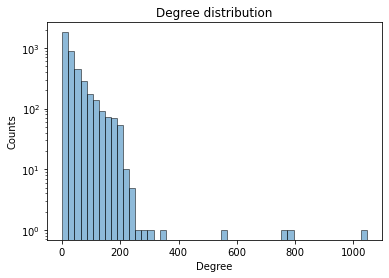

The slope of the linear fit is:  -0.21303107322226497
slope is  -0.2130310732222649


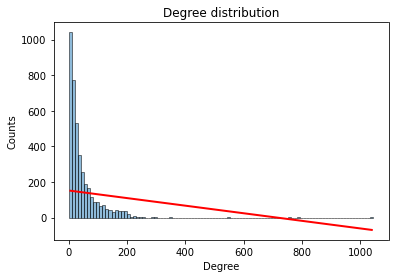

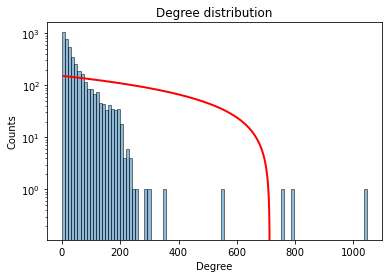

In [ ]:
# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=50, log=True, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=100, log=False, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')

# Fit a linear model to the log-transformed data
x = bins[:-1] + np.diff(bins) / 2
y = counts
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
print("The slope of the linear fit is: ", slope)

# Plot the linear fit
xfit = np.linspace(min(x), max(x), 1000)
yfit = slope * xfit + intercept
plt.plot(xfit, yfit, 'r-', lw=2)

# recheck slope
slope = (yfit[100] - yfit[0])/(xfit[100]-xfit[0])
print('slope is ',slope)

plt.show()

# Plot the degree distribution
counts, bins, patches = plt.hist(degree, bins=100, log=True, alpha=0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')

plt.plot(xfit, yfit, 'r-', lw=2)

plt.show()

-----------------PART 2--------------------------------

PART 2 QUESTION (5)

In [ ]:
node_id = 0
node_neighbors = g.neighbors(node_id)
node_neighbors.append(node_id)
personalized_network = g.induced_subgraph(node_neighbors)

print(personalized_network.summary())

IGRAPH UN-- 348 2866 -- 
+ attr: name (v)


There are 348 Nodes, and 2866 Edges.

PART 2 QUESTION (6)

In [ ]:
diameter = personalized_network.diameter()
print(diameter)

2


The upper bound of the diameter is 2, since the network is defined as a node and it's immediate neighbors, then any 2 nodes will be connected by at most 2 edges through node 0.

For the lower bound, if node 0 is connected to all of its neighbors and all of its neighbors are connected to each other, then the lower bound of the diameter is 1.

PART 2 QUESTION (7)

For the upper bound, this would mean that their exists 2 nodes that are not connected to each other but are connected through node 0. So the shortest path between the nodes is 2 edges, making the diameter 2.

For the lower bound, it means that node 0 is directly connected to all of its neighbors, and all of its neighbors are directly connected to each other. The network would be a complete graph, and there is a direct path of length 1 between any two nodes in the personalized network.

Part 2 Question (8)

In [ ]:
degrees = g.degree()

# count the number of nodes with degree greater than 200
count = 0
total_deg = 0
for degree in degrees:
    if degree > 200:
        count += 1
        total_deg+= degree
total_deg /= count

In [ ]:
count

40

In [ ]:
total_deg

279.375

Part 2 Question 9


In [ ]:
!apt install libcairo2-dev
!pip install pycairo

In [ ]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo

In [ ]:
#core_nodes = [1, 108, 349, 484, 1087]
core_nodes = [0, 107,348,483,1086]
memberships_fg = []
memberships_im = []
memberships_eb = []
fg = []
eb=[]
im=[]
fg_vc=[]
eb_vc=[]
im_vc = []
pns=[]
for node in core_nodes:
    print(node)
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    pns.append(personal_net)
    print(personal_net.is_connected())
    print(personal_net.summary())
    print(g.summary())
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg.append(fg_clusters)
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    eb.append(eb_clusters)
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    im.append(im_clusters)
    layout = personal_net.layout("fr")

    #fig, ax = plt.subplots()
    #layout = eg[i].layout("fr")
    #fc = eg[i].community_fastgreedy().as_clustering()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    fg_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=fg_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = eb_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    eb_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=eb_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = im_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    im_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=fg_color, layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=eb_color, layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=im_color, layout=layout)
    #need help plotting.
    #igraph.plot(fg_clusters, vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, vertex_color=[im_clusters.membership], layout=layout)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=[im_clusters.membership], layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

0
True
IGRAPH UN-- 348 2866 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 0:
Fast-Greedy modularity score: 0.413
Edge-Betweenness modularity score: 0.353
Infomap modularity score: 0.389
107
True
IGRAPH UN-- 1046 27795 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)


KeyboardInterrupt: ignored

In [ ]:
layouts = []
for node in core_nodes:
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    layouts.append(personal_net.layout("fr"))

In [ ]:
for i in range(len(pns)):
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=fg[i], vertex_size=3, vertex_color=fg_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "core_node_"+str(core_nodes[i])+"_fg.png"
    plt.savefig(string)
    plt.clf()
    #igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_eb.png",)
    #igraph.plot(pns[i], mark_groups=im[i], vertex_size=3, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_im.png",)
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(len(pns)):
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "core_node_"+str(core_nodes[i])+"_eb.png"
    plt.savefig(string)
    
    plt.clf()
    #igraph.plot(pns[i], mark_groups=im[i], vertex_size=3, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_im.png",)
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(len(pns)):
    if i!=4:
        fig, ax = plt.subplots()
        igraph.plot(pns[i], mark_groups=im[i], vertex_size=5, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=ax)
        string = "core_node_"+str(core_nodes[i])+"_im.png"
        plt.savefig(string)
        plt.clf()

    #igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_eb.png",)
    #
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
pns[0]

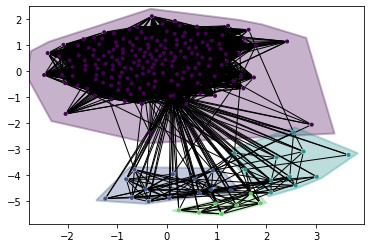

In [ ]:
fig, ax = plt.subplots()

igraph.plot(pns[4], mark_groups=im[4], vertex_size=3,edge_arrow_size=.05,vertex_label="", layout=layouts[4],target=ax)
#plt.savefig('test.png')

#igraph.plot(pns[0], mark_groups=eb[0], vertex_size=3, vertex_color=eb_vc[0],vertex_label="", layout=layouts[0],target=ax)

    

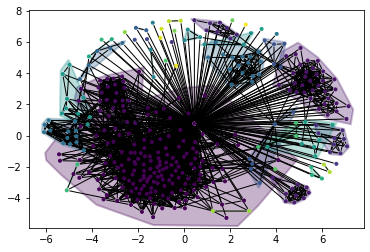

In [ ]:
fig, ax = plt.subplots()
igraph.plot(pns[0], mark_groups=eb[0], vertex_size=3, vertex_color=eb_vc[0],vertex_label="", layout=layouts[0],target=ax)

    

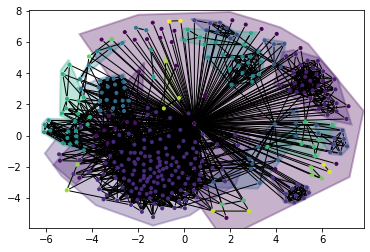

In [ ]:
fig, ax = plt.subplots()
igraph.plot(pns[0], mark_groups=im[0], vertex_size=3, vertex_color=im_vc[0],vertex_label="", layout=layouts[0],target=ax)

    

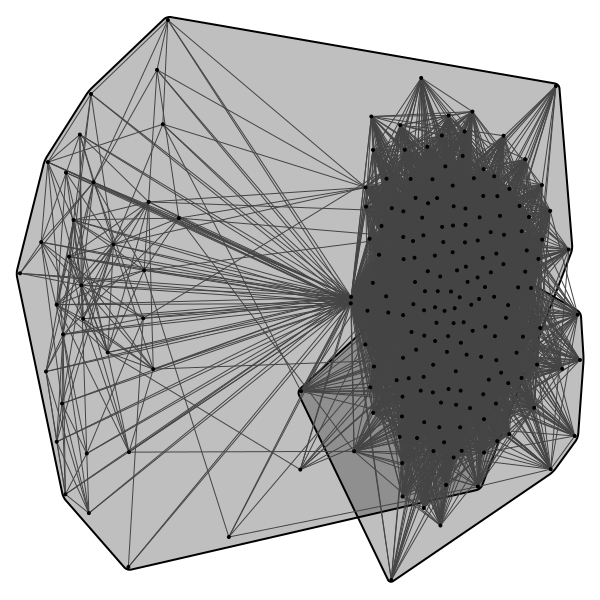

In [ ]:
igraph.plot(personal_net, mark_groups=fg_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)

In [ ]:
igraph.plot(personal_net, mark_groups=eb_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)

In [ ]:
igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)

In [ ]:
#core_nodes = [1, 108, 349, 484, 1087]
core_nodes = [0, 107,348,483,1086]

for node in core_nodes:
    print(node)
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    print(personal_net.is_connected())
    print(personal_net.summary())
    print(g.summary())
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    #layout = eg[i].layout("fr")
    #fc = eg[i].community_fastgreedy().as_clustering()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=fg_clusters, target=f"core_node_{node}_fg.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = eb_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=eb_clusters, target=f"core_node_{node}_eb.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = im_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, target=f"core_node_{node}_im.png", vertex_color=vertex_color, vertex_label="", layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

In [ ]:
#core_nodes = [1, 108, 349, 484, 1087]
core_nodes = [0, 107,348,483,1086]

for node in core_nodes:
    print(node)
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    print(personal_net.is_connected())
    print(personal_net.summary())
    print(g.summary())
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    #layout = eg[i].layout("fr")
    #fc = eg[i].community_fastgreedy().as_clustering()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=fg_clusters, target=f"core_node_{node}_fg.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = eb_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=eb_clusters, target=f"core_node_{node}_eb.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = im_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, target=f"core_node_{node}_im.png", vertex_color=vertex_color, vertex_label="", layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

Part 2 Question 10

In [ ]:
core_nodes = [0, 107,348,483,1086]

for node in core_nodes:
    #temp_g = g.delete_vertices(node)
    #personal_net = g.neighborhood(node, order=1)
    personal_net = g.induced_subgraph(g.neighborhood(node, order=1))

    #personal_net.delete_vertices(node)

    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    igraph.plot(fg_clusters, mark_groups=True)
    igraph.plot(eb_clusters, mark_groups=True)
    igraph.plot(im_clusters, mark_groups=True)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=[im_clusters.membership], layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

In [ ]:
#core_nodes = [1, 108, 349, 484, 1087]
core_nodes = [0, 107,348,483,1086]
memberships_fg = []
memberships_im = []
memberships_eb = []
fg = []
eb=[]
im=[]
fg_vc=[]
eb_vc=[]
im_vc = []
pns=[]
layouts=[]
for node in core_nodes:
    print(node)
    personal_net = g.induced_subgraph(g.neighborhood(node, order=1))
    pns.append(personal_net)
    print(personal_net.is_connected())
    print(personal_net.summary())
    print(g.summary())
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    fg.append(fg_clusters)
    fg_modularity = fg_clusters.modularity

    eb_clusters = personal_net.community_edge_betweenness().as_clustering()
    eb_modularity = eb_clusters.modularity
    eb.append(eb_clusters)
    im_clusters = personal_net.community_infomap()
    im_modularity = im_clusters.modularity
    im.append(im_clusters)
    layout = personal_net.layout("fr")
    layouts.append(layout)

    #fig, ax = plt.subplots()
    #layout = eg[i].layout("fr")
    #fc = eg[i].community_fastgreedy().as_clustering()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    fg_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=fg_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = eb_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    eb_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=eb_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    membership = im_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    im_vc.append(vertex_color)
    igraph.plot(personal_net, mark_groups=im_clusters, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=fg_color, layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=eb_color, layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=im_color, layout=layout)
    #need help plotting.
    #igraph.plot(fg_clusters, vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, vertex_color=[im_clusters.membership], layout=layout)
    #igraph.plot(fg_clusters, target=f"core_node_{node}_fg.png", vertex_color=[fg_clusters.membership], layout=layout)
    #igraph.plot(eb_clusters, target=f"core_node_{node}_eb.png", vertex_color=[eb_clusters.membership], layout=layout)
    #igraph.plot(im_clusters, target=f"core_node_{node}_im.png", vertex_color=[im_clusters.membership], layout=layout)
    
    # print the modularity scores
    print(f"Core node {node}:")
    print(f"Fast-Greedy modularity score: {fg_modularity:.3f}")
    print(f"Edge-Betweenness modularity score: {eb_modularity:.3f}")
    print(f"Infomap modularity score: {im_modularity:.3f}")

0
True
IGRAPH UN-- 348 2866 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 0:
Fast-Greedy modularity score: 0.413
Edge-Betweenness modularity score: 0.353
Infomap modularity score: 0.389
107
True
IGRAPH UN-- 1046 27795 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 107:
Fast-Greedy modularity score: 0.436
Edge-Betweenness modularity score: 0.507
Infomap modularity score: 0.508
348
True
IGRAPH UN-- 230 3441 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 348:
Fast-Greedy modularity score: 0.252
Edge-Betweenness modularity score: 0.134
Infomap modularity score: 0.204
483
True
IGRAPH UN-- 232 4525 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 483:
Fast-Greedy modularity score: 0.507
Edge-Betweenness modularity score: 0.489
Infomap modularity score: 0.515
1086
True
IGRAPH UN-- 206 7409 -- 
+ attr: name (v)
IGRAPH UN-- 4039 88234 -- 
+ attr: name (v)
Core node 1086:
Fast-Greedy mo

In [ ]:
for i in range(len(pns)):
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=fg[i], vertex_size=3, vertex_color=fg_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "no_core_node_"+str(core_nodes[i])+"_fg.png"
    plt.savefig(string)
    plt.clf()
    #igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_eb.png",)
    #igraph.plot(pns[i], mark_groups=im[i], vertex_size=3, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_im.png",)
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(len(pns)):
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "no_core_node_"+str(core_nodes[i])+"_eb.png"
    plt.savefig(string)
    
    plt.clf()
    #igraph.plot(pns[i], mark_groups=im[i], vertex_size=3, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_im.png",)
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(len(pns)):
    #if i!=4:
    fig, ax = plt.subplots()
    igraph.plot(pns[i], mark_groups=im[i], vertex_size=5, vertex_color=im_vc[i],vertex_label="", layout=layouts[i],target=ax)
    string = "no_core_node_"+str(core_nodes[i])+"_im.png"
    plt.savefig(string)
    plt.clf()

    #igraph.plot(pns[i], mark_groups=eb[i], vertex_size=3, vertex_color=eb_vc[i],vertex_label="", layout=layouts[i],target=f"core_node_{core_nodes[i]}_eb.png",)
    #
    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Question 11

The embeddedness between the core node and the target node is equal to the degree of the target node plus one.

Question (12)

[444, 872, 1760, 72, 122, 492, 474, 7238, 42, 338, 366, 2108, 2590, 478, 5518, 9238, 1092, 82, 248, 500, 338, 196, 190, 906, 420, 54, 384, 378, 5050, 8844, 7122, 9326, 736, 220, 6348, 2570, 2950, 3432, 4920, 2, 244, 8, 2262, 84, 56, 6, 84, 56, 56, 56, 84, 56, 56, 268, 190, 190, 1052, 2248, 436, 244, 658, 2634, 16, 0, 22, 60, 24, 22, 12, 60, 566, 122, 822, 18, 106, 354, 34, 644, 124, 238, 2112, 4926, 826, 1268, 30, 38, 60, 60, 12, 6, 6, 6, 60, 12, 7184, 400, 9950, 208, 108, 200, 118, 216, 2246, 1030, 406, 938, 578, 860, 206, 816, 2790, 3254, 5034, 1078, 656, 780, 6638, 298, 8418, 3508, 348, 6386, 3000, 130, 720, 1928, 1000, 140, 1544, 88, 2966, 0, 0, 1194, 388, 1830, 3414, 1942, 1646, 2520, 1160, 866, 522, 5124, 2108, 918, 2018, 2006, 236, 168, 834, 246, 34, 376, 216, 0, 80, 190, 550, 174, 66, 188, 356, 102, 0, 2, 0, 8, 358, 280, 8, 2, 20, 50, 304, 2918, 286, 1328, 164, 146, 366, 274, 250, 134, 384, 272, 366, 612, 196, 272, 284, 308, 1026, 14, 36, 0, 36, 188, 0, 0, 0, 4, 36, 0, 0, 234, 

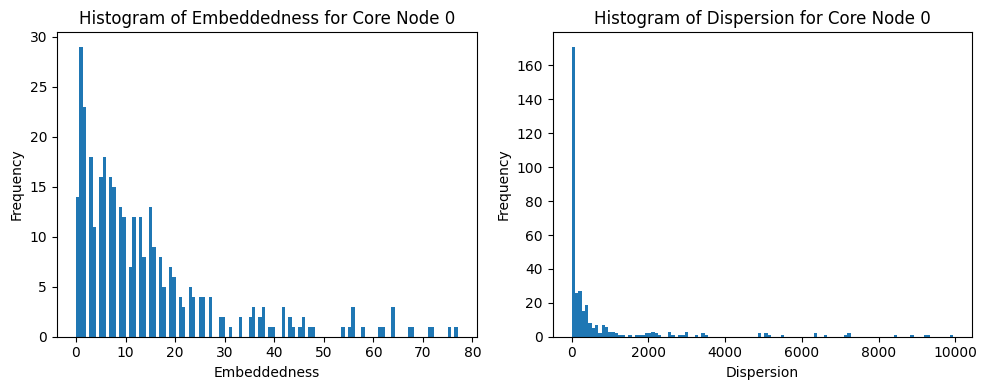

[2, 8, 164, 318, 0, 778, 6, 24, 44, 12, 4038, 320, 5926, 4038, 4826, 1592, 1106, 366, 252, 2778, 2312, 59678, 7962, 2518, 11470, 2888, 194, 1702, 1320, 5890, 262, 9894, 16650, 5552, 4632, 3918, 1744, 660, 1484, 9066, 5420, 1916, 2976, 3462, 6042, 1488, 6020, 2556, 9190, 2138, 244, 1554, 7434, 7234, 7164, 1556, 1588, 3258, 1578, 6980, 1154, 3514, 4502, 2230, 1710, 980, 3894, 2048, 1806, 1400, 2290, 2534, 8350, 10, 1636, 5710, 3684, 3100, 2682, 2250, 2346, 596, 46, 12680, 3298, 1752, 1854, 1624, 1398, 1204, 1978, 1742, 60, 58, 434, 634, 868, 2666, 1356, 14, 2094, 628, 2024, 128, 1992, 3420, 10486, 2122, 610, 1978, 3246, 4890, 970, 1836, 300, 1204, 1184, 4804, 13540, 6094, 3508, 1904, 7520, 780, 2738, 534, 3468, 1602, 50, 0, 600, 2092, 1124, 2254, 2188, 5938, 25292, 34536, 868, 782, 5764, 1968, 4190, 2050, 15420, 3482, 4164, 9120, 6686, 81938, 3846, 3148, 18632, 2072, 5828, 6174, 4736, 14104, 17658, 1568, 6474, 6428, 24416, 2100, 6338, 4946, 532, 3082, 2290, 2040, 8200, 1822, 1676, 3500, 

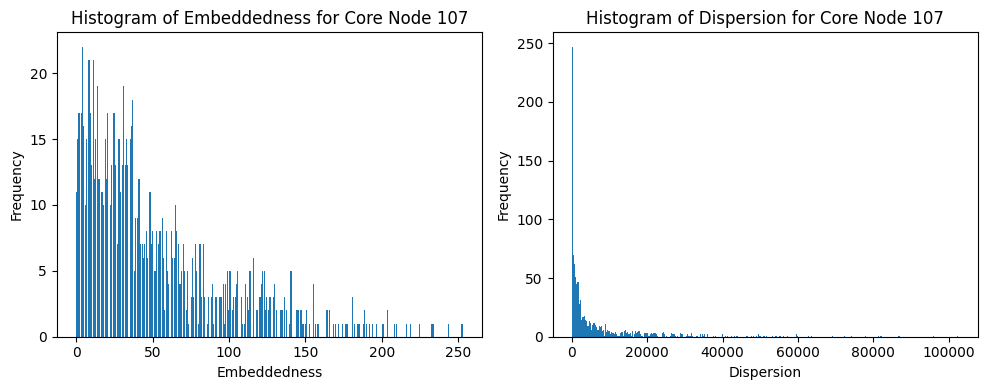

[8, 36, 3010, 8308, 320, 4038, 3934, 3516, 16526, 464, 962, 13236, 8152, 3802, 7900, 1338, 4076, 10556, 5190, 12, 106, 4, 32, 70, 16, 70, 30, 46, 46, 20, 46, 84, 14, 1240, 42, 418, 60, 540, 1038, 8, 3816, 316, 5908, 412, 92, 2306, 11218, 2988, 764, 2698, 186, 2514, 640, 1234, 8, 7970, 2, 578, 1392, 260, 1222, 1350, 3770, 4306, 1468, 12746, 5924, 5320, 288, 1784, 4086, 4562, 590, 4766, 6872, 506, 4170, 5868, 9186, 1946, 4384, 5358, 5212, 1944, 4474, 370, 6922, 1176, 1506, 1398, 1738, 8616, 8082, 5188, 4156, 3406, 4234, 2018, 44, 5260, 7452, 1242, 2844, 834, 2204, 934, 666, 134, 936, 468, 592, 2550, 992, 2698, 296, 454, 992, 690, 6240, 1030, 1354, 2102, 1950, 1480, 4608, 254, 554, 1480, 8804, 472, 0, 0, 0, 342, 292, 474, 88, 674, 150, 252, 148, 212, 444, 426, 296, 340, 0, 130, 1690, 106, 2, 6, 2608, 460, 30, 1324, 6106, 906, 4956, 158, 3250, 2654, 658, 6346, 2490, 454, 1734, 214, 6, 328, 1004, 1426, 154, 5854, 3856, 48, 2882, 264, 2664, 326, 558, 204, 114, 96, 118, 124, 1922, 2548, 2614,

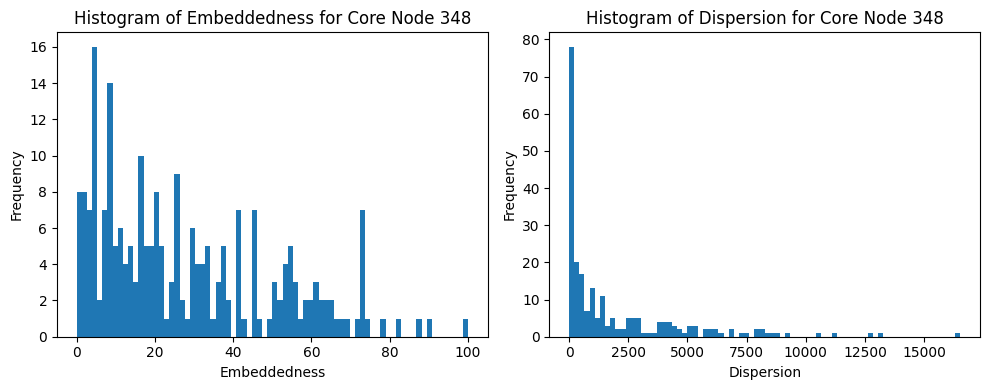

[59678, 8152, 13554, 11662, 11708, 9096, 3156, 1004, 10042, 9934, 10266, 2594, 7690, 1142, 6730, 9534, 438, 426, 6788, 12604, 3828, 5230, 3344, 4470, 694, 3114, 220, 1492, 3512, 1480, 2008, 260, 580, 1282, 1146, 690, 5098, 2514, 2412, 564, 4918, 4238, 4296, 612, 466, 2890, 2146, 1882, 1514, 2790, 1150, 2806, 1112, 570, 1770, 500, 1758, 2402, 1266, 2270, 1346, 3406, 1362, 3578, 1974, 3384, 1588, 3188, 562, 314, 1118, 1538, 1500, 1282, 1980, 5352, 1562, 1866, 1836, 530, 8258, 2698, 2020, 1480, 278, 2586, 244, 498, 546, 358, 428, 4598, 760, 1302, 2386, 12, 630, 666, 838, 2364, 60, 6, 2762, 1038, 1222, 1446, 2808, 580, 1146, 898, 2006, 4980, 1506, 1132, 1154, 224, 3154, 588, 58, 808, 3886, 22, 518, 4150, 1894, 1566, 770, 214, 110, 2426, 460, 906, 902, 390, 4608, 1404, 1576, 4276, 1400, 2424, 1002, 1746, 1520, 536, 990, 3538, 4634, 862, 738, 516, 1398, 3724, 2404, 1598, 5316, 1100, 198, 554, 4884, 130, 1400, 994, 3280, 4324, 2732, 530, 816, 202, 2810, 4702, 3244, 2796, 30, 1006, 2534, 1326,

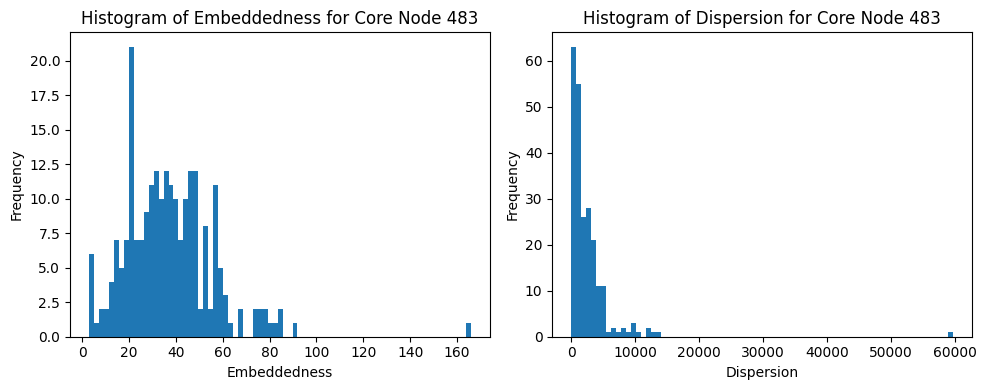

[81938, 612, 84, 168, 400, 234, 12394, 248, 13920, 4246, 16554, 7436, 4446, 6332, 6600, 10000, 4898, 6566, 1996, 12996, 3610, 11908, 2, 5000, 1802, 128, 2872, 1222, 17592, 78, 1572, 2416, 12946, 21062, 9442, 116, 7752, 192, 9274, 1438, 8412, 1778, 9710, 24836, 6492, 2554, 15704, 2454, 46, 11226, 4076, 13366, 6666, 7710, 256, 7216, 9708, 866, 15602, 16254, 100, 4464, 28832, 1696, 3814, 18184, 6618, 8790, 286, 12906, 6732, 10910, 7300, 11574, 8902, 7360, 104, 2014, 5928, 5070, 7738, 48, 9178, 2028, 106, 7936, 7392, 10264, 5560, 4276, 2632, 27216, 218, 15322, 9298, 2512, 16282, 18038, 25078, 18116, 20630, 3034, 7418, 44, 50, 144, 74, 28758, 138, 10846, 4498, 13640, 2494, 96, 6586, 19872, 3980, 4940, 11874, 6882, 16038, 630, 12060, 3556, 10942, 604, 11350, 4802, 142, 5968, 1734, 23244, 14798, 8822, 12336, 11506, 4382, 6882, 21092, 20922, 7822, 10068, 7712, 21730, 18032, 3618, 6030, 4630, 4210, 52, 13450, 29938, 10992, 11520, 18, 6388, 22, 54, 3344, 9160, 24118, 22108, 48, 11732, 7504, 1104

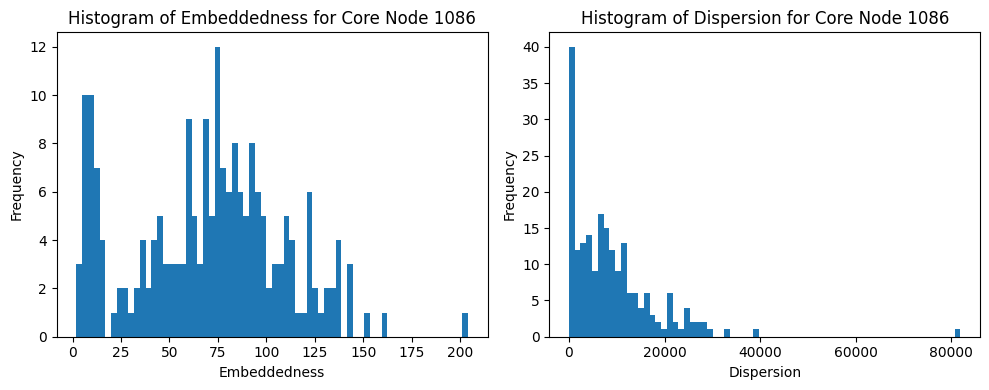

In [72]:
import networkx as nx
# import matplotlib.pyplot as plt

# Create personalized networks
core_nodes = [0, 107, 348, 483, 1086]
personalized_networks = []
for core_node in core_nodes:
    pn = nx.Graph()
    neighbors = list(g.neighbors(core_node))
    pn.add_node(core_node)
    for neighbor in neighbors:
        pn.add_node(neighbor)
        pn.add_edge(core_node, neighbor)
        pn.add_edges_from([(neighbor, n) for n in g.neighbors(neighbor) if n in neighbors and n!=core_node])
    personalized_networks.append(pn)

# Calculate embeddedness and dispersion
for i, pn in enumerate(personalized_networks):
    core_node = core_nodes[i]
    degrees = dict(pn.degree())
    embeddedness = [len(set(g.neighbors(core_node)) & set(pn.neighbors(node))) for node in pn.nodes() if node != core_node]
    dispersion = []
    for node in pn.nodes():
        if node == core_node:
            continue
        mutual_neighbors = set(g.neighbors(core_node)) & set(pn.neighbors(node))
        pn_modified = pn.subgraph(mutual_neighbors).copy()
        if core_node in mutual_neighbors:
          pn_modified.remove_node(core_node)
        if node in mutual_neighbors:
          pn_modified.remove_node(node)
        try:
            lengths = dict(nx.shortest_path_length(pn_modified))
            distances = [lengths[n1][n2] for n1 in lengths for n2 in lengths[n1] if n1 != n2]
            dispersion.append(sum(distances))
        except nx.NetworkXNoPath:
            dispersion.append(0)

    # Plot histograms
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].hist(embeddedness, bins=int(len(embeddedness)/3))
    axs[0].set_xlabel('Embeddedness')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Histogram of Embeddedness for Core Node {}'.format(core_node))
    print(dispersion)
    axs[1].hist(dispersion, bins=int(len(dispersion)/3))
    axs[1].set_xlabel('Dispersion')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Histogram of Dispersion for Core Node {}'.format(core_node))
    plt.tight_layout()
    plt.show()

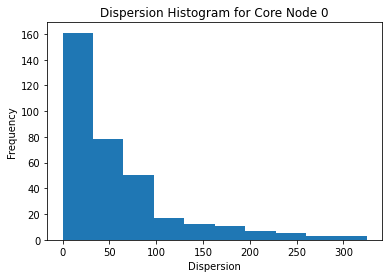

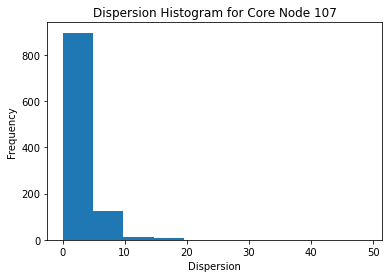

InternalError: Error at src/graph/type_indexededgelist.c:770: Given vertex is not in the graph. -- Invalid vertex id

In [ ]:
import igraph
import numpy as np
import matplotlib.pyplot as plt

def mutual_friends(graph, target, core):
    core_neighbors = set(graph.neighbors(core))
    target_neighbors = set(graph.neighbors(target))
    return core_neighbors.intersection(target_neighbors)

def embeddedness(graph, target, core):
    mutual_friends_count = len(mutual_friends(graph, target, core))
    return mutual_friends_count

def dispersion(graph, target, core):
    if target == core:
        return 0
    
    target_neighbors = set(graph.neighbors(target))
    core_neighbors = set(graph.neighbors(core))
    intersection = target_neighbors.intersection(core_neighbors)
    embeddedness = len(intersection)
    
    if embeddedness <= 1:
        return 0
    
    target_degree = graph.degree(target)
    core_degree = graph.degree(core)
    eg2 = graph.copy()
    eg2.delete_vertices([target, core])
    
    ver = [v for v in intersection]
    core_index = core
    
    # Ensure all vertices in ver and core_index are valid vertices in eg2
    valid_vertices = set(eg2.vs.indices)
    ver = [v for v in ver if v in valid_vertices]
    core_index = core_index if core_index in valid_vertices else None
    
    if not ver or core_index is None:
        return 0
    
    disp_mat = eg2.shortest_paths(source=core_index, target=ver)
    disp_mat = np.array(disp_mat)
    disp_mat[np.isinf(disp_mat)] = eg2.diameter() + 1
    dispersion_value = np.sum(disp_mat)
    
    return dispersion_value


core_nodes = [0, 107, 348, 483, 1086]
for core_id in core_nodes:
    personal_net = g.subgraph(g.neighborhood(core_id, order=1))
    personal_nodes = personal_net.vs.indices
    embeddedness_values = []
    dispersion_values = []

    for node_id in personal_nodes:
        if node_id != core_id:  
            embeddedness_values.append(embeddedness(personal_net, node_id, core_id))
            dispersion_values.append(dispersion(personal_net, node_id, core_id))


    plt.hist(dispersion_values)
    plt.title(f"Dispersion Histogram for Core Node {core_id}")
    plt.xlabel("Dispersion")
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
import igraph
import numpy as np
import matplotlib.pyplot as plt

def mutual_friends(graph, target, core):
    core_neighbors = set(graph.neighbors(core))
    target_neighbors = set(graph.neighbors(target))
    return core_neighbors.intersection(target_neighbors)

def embeddedness(graph, target, core):
    mutual_friends_count = len(mutual_friends(graph, target, core))
    return mutual_friends_count

def dispersion(graph, target, core):
    if target == core:
        return 0
    
    target_neighbors = set(graph.neighbors(target))
    core_neighbors = set(graph.neighbors(core))
    intersection = target_neighbors.intersection(core_neighbors)
    embeddedness = len(intersection)
    
    if embeddedness <= 1:
        return 0
    
    target_degree = graph.degree(target)
    core_degree = graph.degree(core)
    eg2 = graph.copy()
    eg2.delete_vertices([target, core])
    
    ver = [v for v in intersection]
    ver1 = [eg2.vs[v].index for v in ver]
    core_index = eg2.vs[core].index
    
    disp_mat = eg2.shortest_paths(source=core_index, target=ver1)
    disp_mat = np.array(disp_mat)
    disp_mat[np.isinf(disp_mat)] = eg2.diameter() + 1
    dispersion_value = np.sum(disp_mat)
    
    return dispersion_value


core_nodes = [0, 107, 348, 483, 1086]
for core_id in core_nodes:
    personal_net = g.subgraph(g.neighborhood(core_id, order=1))
    personal_nodes = personal_net.vs.indices
    embeddedness_values = []
    dispersion_values = []

    for node_id in personal_nodes:
        if node_id != core_id:  
            embeddedness_values.append(embeddedness(personal_net, node_id, core_id))
            dispersion_values.append(dispersion(personal_net, node_id, core_id))


    plt.hist(dispersion_values)
    plt.title(f"Dispersion Histogram for Core Node {core_node}")
    plt.xlabel("Dispersion")
    plt.ylabel("Frequency")
    plt.show()




IndexError: vertex index out of range

<class 'list'>


AttributeError: 'list' object has no attribute 'apppend'

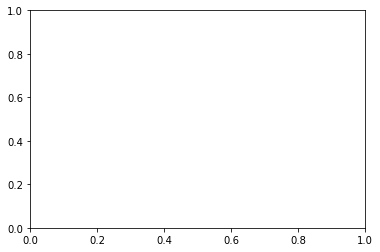

In [ ]:
import igraph
import numpy as np
import matplotlib.pyplot as plt

def mutual_friends(graph, target, core):
    core_neighbors = set(graph.neighbors(core))
    target_neighbors = set(graph.neighbors(target))
    return core_neighbors.intersection(target_neighbors)

def embeddedness(graph, target, core):
    mutual_friends_count = len(mutual_friends(graph, target, core))
    return mutual_friends_count

def dispersion(graph, target, core):
    if target == core:
        return 0
    
    target_neighbors = set(graph.neighbors(target))
    core_neighbors = set(graph.neighbors(core))
    intersection = target_neighbors.intersection(core_neighbors)
    embeddedness = len(intersection)
    
    if embeddedness <= 1:
        return 0
    
    target_degree = graph.degree(target)
    core_degree = graph.degree(core)
    eg2 = graph.copy()
    eg2.delete_vertices([target, core])
    
    ver = [v for v in intersection]
    ver1 = [eg2.vs[v].index for v in ver]
    core_index = eg2.vs[core].index
    
    disp_mat = eg2.shortest_paths(source=core_index, target=ver1)
    disp_mat = np.array(disp_mat)
    disp_mat[np.isinf(disp_mat)] = eg2.diameter() + 1
    dispersion_value = np.sum(disp_mat)
    
    return dispersion_value

# Read the graph from file
#g = igraph.Graph.Read("facebook_combined.txt")

# Define the core nodes
core_nodes = [0, 107, 348, 483, 1086]
pns=[]
fgs=[]
vcss=[]
lay=[]
for node in core_nodes:
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    max_disp_node = np.argmax([dispersion(g, target, node) for target in core_nodes])
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    
    # Highlight node with maximum dispersion
    vertex_color[max_disp_node] = max(membership) + 1  # Set a new color
    pns.append(personal_net)
    fgs.append(fg_clusters)
    print(type(vertex_color))
    vcss.apppend(np.array(vertex_color))
    lay.append(layout)
    igraph.plot(personal_net, mark_groups=fg_clusters, target=f"core_node_{node}_community.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout,)


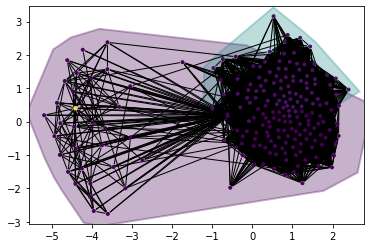

In [ ]:
core_nodes = [0, 107, 348, 483, 1086]
node = 1086
personal_net = g.subgraph(g.neighborhood(node, order=1))
fg_clusters = personal_net.community_fastgreedy().as_clustering()
max_disp_node = np.argmax([dispersion(g, target, node) for target in core_nodes])

layout = personal_net.layout("fr")

fig, ax = plt.subplots()
membership = fg_clusters.membership
vertex_color = [membership[vertex.index] for vertex in personal_net.vs]

# Highlight node with maximum dispersion
vertex_color[max_disp_node] = max(membership) + 25  # Set a new color

igraph.plot(personal_net, mark_groups=fg_clusters, target=ax, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout,)


In [ ]:
import igraph
import numpy as np
import matplotlib.pyplot as plt

def mutual_friends(graph, target, core):
    core_neighbors = set(graph.neighbors(core))
    target_neighbors = set(graph.neighbors(target))
    return core_neighbors.intersection(target_neighbors)

def embeddedness(graph, target, core):
    mutual_friends_count = len(mutual_friends(graph, target, core))
    return mutual_friends_count

def dispersion(graph, target, core):
    if target == core:
        return 0
    
    target_neighbors = set(graph.neighbors(target))
    core_neighbors = set(graph.neighbors(core))
    intersection = target_neighbors.intersection(core_neighbors)
    embeddedness = len(intersection)
    
    if embeddedness <= 1:
        return 0
    
    target_degree = graph.degree(target)
    core_degree = graph.degree(core)
    eg2 = graph.copy()
    eg2.delete_vertices([target, core])
    
    ver = [v for v in intersection]
    ver1 = [eg2.vs[v].index for v in ver]
    core_index = eg2.vs[core].index
    
    disp_mat = eg2.shortest_paths(source=core_index, target=ver1)
    disp_mat = np.array(disp_mat)
    disp_mat[np.isinf(disp_mat)] = eg2.diameter() + 1
    dispersion_value = np.sum(disp_mat)
    
    return dispersion_value

# Read the graph from file
#g = igraph.Graph.Read("facebook_combined.txt")

# Define the core nodes
core_nodes = [0, 107, 348, 483, 1086]

for node in core_nodes:
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    
    # Calculate embeddedness for each neighbor of the core node
    embeddedness_values = []
    for neighbor in core_nodes:
        if neighbor != node:
            embeddedness_values.append(embeddedness(personal_net, neighbor, node))
    
    # Find the node with maximum dispersion embeddedness (excluding zero embeddedness nodes)
    max_disp_embed_node = np.argmax(embeddedness_values)
    
    max_disp_node = core_nodes[max_disp_embed_node]  # Get the node ID
    
    # Highlight node with maximum dispersion embeddedness
    fg_clusters_graph = fg_clusters.graph
    fg_clusters_graph.vs[max_disp_node]['color'] = 'red'  # Set the color of the node
    
    # Highlight the edges incident to the maximum dispersion embeddedness node
    incident_edges = fg_clusters_graph.incident(fg_clusters_graph.vs[max_disp_node])
    fg_clusters_graph.es[incident_edges]['color'] = 'red'  # Set the color of the edges
    
    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]
    
    igraph.plot(personal_net, mark_groups=fg_clusters, target=f"test_core_node_{node}_community.png", vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)
    
    # Print the ID of the node with maximum dispersion embeddedness
    print(f"Node ID with Maximum Dispersion Embeddedness for Core Node {node}: {max_disp_node}")


InternalError: Error at src/graph/type_indexededgelist.c:770: Given vertex is not in the graph. -- Invalid vertex id

2
0
4
1
3
2
1
3
1
4


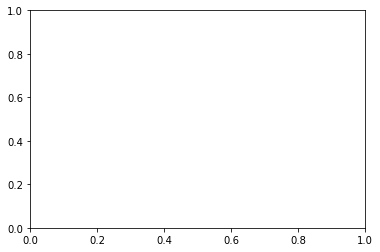

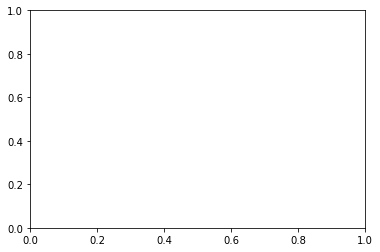

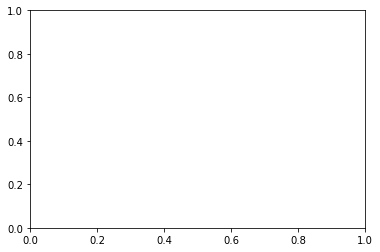

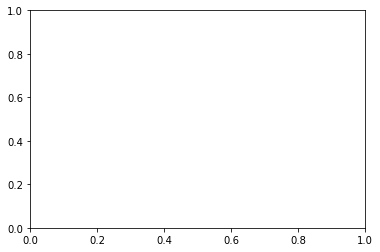

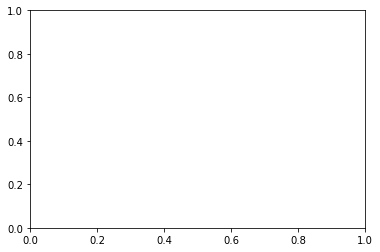

In [ ]:
node = 1086
core_nodes = [0, 107, 348, 483, 1086]
for node in core_nodes:
    personal_net = g.subgraph(g.neighborhood(node, order=1))
    fg_clusters = personal_net.community_fastgreedy().as_clustering()
    max_disp_node = np.argmax([dispersion(g, target, node) for target in core_nodes])
    max_embed_node = np.argmax([embeddedness(g, target, node) for target in core_nodes])

    layout = personal_net.layout("fr")

    fig, ax = plt.subplots()
    membership = fg_clusters.membership
    vertex_color = [membership[vertex.index] for vertex in personal_net.vs]

    # Highlight node with maximum dispersion
    vertex_color[max_disp_node] = max(membership) + 25  # Set a new color

    # Highlight node with highest embeddedness
    vertex_color[max_embed_node] = max(membership) +35# Set a different color
    print(max_disp_node)
    print(max_embed_node)
    #igraph.plot(personal_net, mark_groups=fg_clusters, target=ax, vertex_size=3, vertex_color=vertex_color, vertex_label="", layout=layout)